# Exploring and Summarizing the Titanic Dataset
### Anuya Karnik
### CPTR 475: Introduction to Data Science
### Final Project

This project revolves around the Titanic Dataset from Kaggle. It has a train and a test set. We will be using just the train set for this project. The main focus is to explore who survived and what were the strongest factors contributing to their survival by making useful plots and graphs. Factors include gender, age, socio-economic status, number of members in the passenger's family, etc. which will help us take a step further towards creating an actual model which takes these relations into consideration and then evaluate on the test set.


## Setup

Setup for downloading the data from kaggle.

In [0]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt; plt.rcdefaults()

import numpy as np

import seaborn as sns

In [0]:
#installing the kaggle API
!pip install kaggle


In [0]:
from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth

auth.authenticate_user()

drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])

#filename = "/content/.kaggle/kaggle.json"
filename = "/root/.kaggle/kaggle.json"
os.makedirs(os.path.dirname(filename), exist_ok=True)

request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

Download 100%.


In [0]:
! ls -a /root/.kaggle

.  ..  kaggle.json


In [0]:
! kaggle competitions download -c titanic

  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 25.3MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 23.7MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 3.35MB/s]


In [0]:
! ls

adc.json  gender_submission.csv  sample_data  test.csv	train.csv


## Exploring the Data

We will use the train.csv to explore and gain a basic understanding of what the dataset is comprised of.

Let's convert train.csv to a pandas dataframe first.

In [0]:
titanic = pd.read_csv('train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
titanic.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Gee, Mr. Arthur H",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [0]:
titanic.shape
print('This dataset has {} rows and {} columns (features).'.format(titanic.shape[0], titanic.shape[1]))

This dataset has 891 rows and 12 columns (features).


In [0]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [0]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Are there any missing values in the dataset?

In [0]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There are 687 missing values for the Cabin column, which is about 75%. So it would be best to drop this column as a whole.

In [0]:
titanic = titanic.drop('Cabin', axis=1)
titanic.shape

(891, 11)

We will deal with the missing values for the age and the embarked column as we progress.

## Q1) From where did most passengers board the Titanic?

According to Kaggle, the keys for the ports are as follows:

S = Southampton

C = Cherbourg

Q = Queenstown

Let's see which one of the places had the most survivors


In [0]:
titanic_embarked = titanic.groupby('Embarked').count()
titanic_embarked

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
Embarked,,,,,,,,,,
C,168,168,168,168,168,130,168,168,168,168
Q,77,77,77,77,77,28,77,77,77,77
S,644,644,644,644,644,554,644,644,644,644


We can see that most passengers embarked for their journey from port 'S'. So it would be safe to replace the two missing values in *Embarked* by 'S'

In [0]:
titanic = titanic.fillna({"Embarked": "S"})

In [0]:
titanic_embarked = titanic.groupby('Embarked').count()
titanic_embarked

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
Embarked,,,,,,,,,,
C,168,168,168,168,168,130,168,168,168,168
Q,77,77,77,77,77,28,77,77,77,77
S,646,646,646,646,646,556,646,646,646,646


In [0]:
c = titanic["Survived"][titanic['Embarked'] == 'C'].value_counts(normalize=True)
s = titanic["Survived"][titanic['Embarked'] == 'S'].value_counts(normalize=True)
q = titanic["Survived"][titanic['Embarked'] == 'Q'].value_counts(normalize=True)

In [0]:
print('Cherbourg survivors: {}%'.format(round(c[1]*100), 2))
print('Southampton survivors: {}%'.format(round(s[1]*100), 2))
print('Queenstown survivors: {}%'.format(round(q[1]*100), 2))

Cherbourg survivors: 55.0%
Southampton survivors: 34.0%
Queenstown survivors: 39.0%


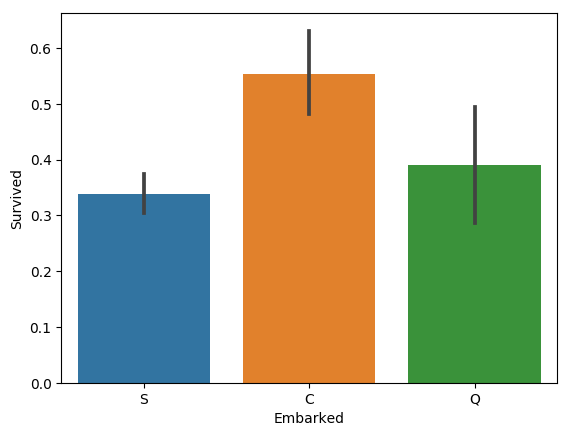

In [0]:
sns.barplot(x="Embarked", y="Survived", data=titanic)

While most passengers boarded the Titanic from Southampton, passengers who boarded from Cherbourg had the most number of survivors.



## Q2) What are the percentages of males and females aboard the Titanic?

In [0]:
females = titanic[titanic['Sex'] == 'female']
males = titanic[titanic['Sex'] == 'male']

In [0]:
females['Sex'].count()

314

In [0]:
males['Sex'].count()

577

In [0]:
print('The percentage of women aboard the Titanic was {}%. '.format(round((females['Sex'].count())/(titanic['Sex'].count()) * 100, (2))))

The percentage of women aboard the Titanic was 35.24%. 


In [0]:
print('The percentage of males aboard the Titanic was {}%. '.format(round((males['Sex'].count())/(titanic['Sex'].count()) * 100, (2))))

The percentage of males aboard the Titanic was 64.76%. 


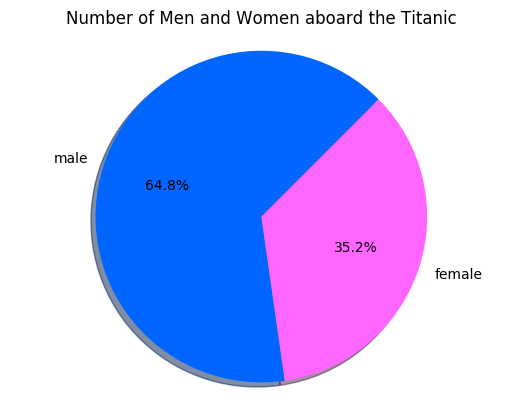

In [0]:
sex = ('male', 'female')
counts = [males['Sex'].count(), females['Sex'].count()]

plt.title('Number of Men and Women aboard the Titanic')


colors = ['#0066ff', '#ff66ff']

plt.pie(counts, labels=sex, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=45)

plt.axis('equal')
plt.show()

## Q3) What is the number of males and females on the Titanic who survived?

In [0]:
titanic["Survived"][titanic["Sex"] == 'female'].value_counts(normalize=True)

1    0.742038
0    0.257962
Name: Survived, dtype: float64

In [0]:
titanic["Survived"][titanic["Sex"] == 'male'].value_counts(normalize=True)

0    0.811092
1    0.188908
Name: Survived, dtype: float64

We can see that lower number of men survived as compared to women corresponding to the policy of letting women and children escape first.

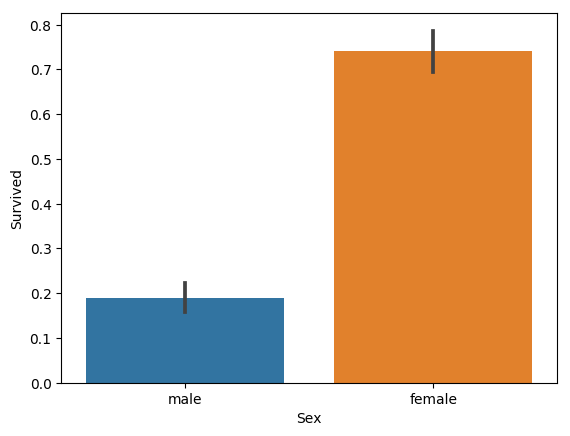

In [0]:
sns.barplot(x="Sex", y="Survived", data=titanic)

Let's also analyze how many men and women from each port survived.

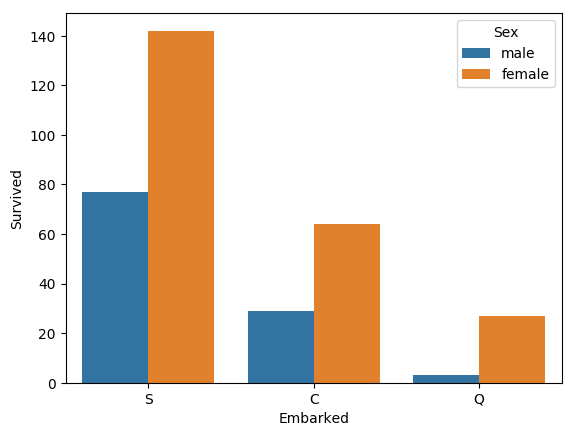

In [0]:
sns.barplot(x='Embarked', y='Survived', hue='Sex', data=titanic, ci=None, estimator=sum)

## Q4) What percentage of children survived?

In [0]:
children = titanic[titanic['Age'] <= 12]
children.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,Q
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,S
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,C


In [0]:
children_survival_stats = [children['Survived'].value_counts(normalize=True)]
children_survival_stats

[1    0.57971
 0    0.42029
 Name: Survived, dtype: float64]

While 58% of the children aboard the Titanic made it safely, the rest, unfortunately, did not survive.

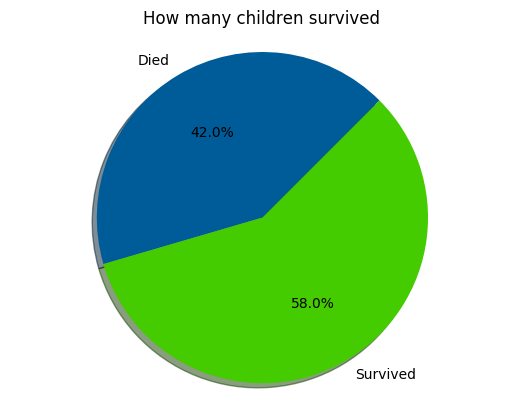

In [0]:
surv = ('Died', 'Survived')
counts = (children['Survived'].value_counts()[0], children['Survived'].value_counts()[1])

plt.title('How many children survived')


colors = ['#005c99', '#44cc00']

plt.pie(counts, labels=surv, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=45)

plt.axis('equal')
plt.show()

## Q5) How was survival for other age groups?

### Finding more about age groups

Let's find out more about the number of people in different age groups.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4cc0b46b70>]],
      dtype=object)

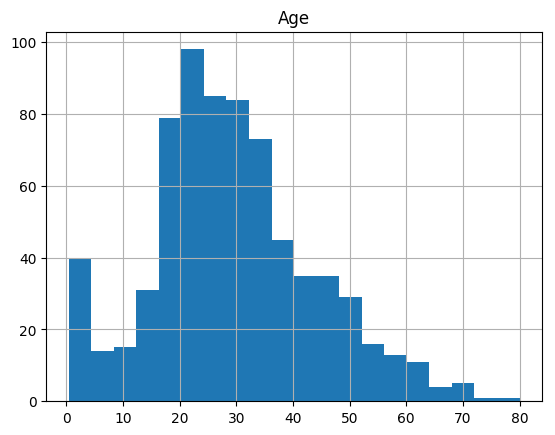

In [0]:
titanic.hist(column='Age', bins=20)

This shows that the maximum number of people aboard the Titanic were in there 30s to 40s. 

Let's get a clearer picture of these age groups and what percent of each age group survived

In [0]:
teens = titanic[(titanic['Age'] <= 18) & (titanic['Age'] > 12)]
teens.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,S
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,Q
38,39,0,3,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,18.0000,S
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,C


In [0]:
young_adults = titanic[(titanic['Age'] > 18) & (titanic['Age'] <= 30)]
young_adults.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,S


In [0]:
adults = titanic[(titanic['Age'] > 30) & (titanic['Age'] <= 50)]
adults.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,S


In [0]:
seniors = titanic[titanic['Age'] > 50]
seniors.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,S
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,C


In [0]:
counts = [children['Survived'].count(),
         teens['Survived'].count(),
         adults['Survived'].count(),
         young_adults['Survived'].count(),
         seniors['Survived'].count()]

In [0]:
counts

[69, 70, 241, 270, 64]

Text(0.5, 1.0, 'Ages of the people aboard the Titanic')

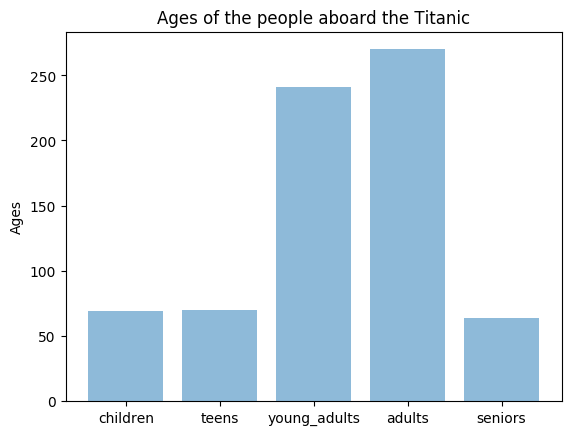

In [0]:
age_status = ('children', 'teens', 'young_adults', 'adults', 'seniors')
y_pos = np.arange(len(age_status))

plt.bar(y_pos, counts, align='center', alpha=0.5)
plt.xticks(y_pos, age_status)
plt.ylabel('Ages')
plt.title('Ages of the people aboard the Titanic')

### Missing age values

From the analysis above, we can see that the majority of the people lie between the ages of 18-50 i.e they are most likely to be either teens or adults.

So it would be a good strategy to use a random value between 18 and 50 to fill the missing age values.

In [0]:
titanic['Age'].isnull().sum()

177

In [0]:
import random
titanic['Age'] = titanic['Age'].fillna(random.randint(18, 50))

In [0]:
titanic['Age'].isnull().sum()

0

There are a lot more adults and young_adults aboard the Titanic than children, teens, and seniors. 

Let's further understand the survival rate of these groups.

In [0]:
survival_stats = [children['Survived'].value_counts(normalize=True)[1]*100,
                 teens['Survived'].value_counts(normalize=True)[1]*100,
                 young_adults['Survived'].value_counts(normalize=True)[1]*100,
                 adults['Survived'].value_counts(normalize=True)[1]*100,
                 seniors['Survived'].value_counts(normalize=True)[1]*100]
survival_stats

[57.971014492753625,
 42.857142857142854,
 35.55555555555556,
 42.32365145228216,
 34.375]

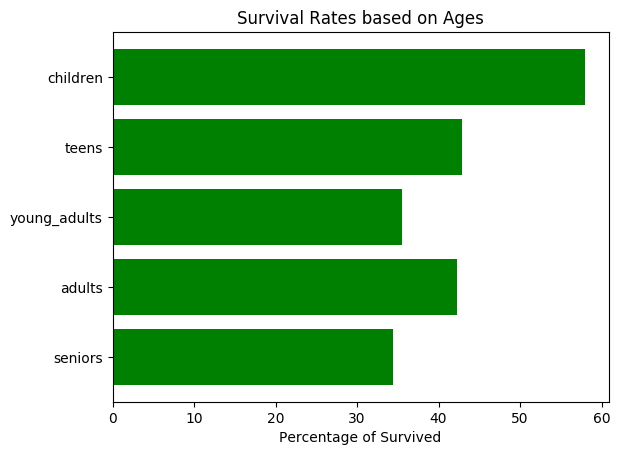

In [0]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

age_status = ('children', 'teens', 'young_adults', 'adults', 'seniors')
y_pos = np.arange(len(age_status))

ax.barh(y_pos, survival_stats, align='center',
        color='green', ecolor='black')
plt.yticks(y_pos, age_status)
plt.xlabel('Percentage of Survived')
plt.title('Survival Rates based on Ages')
ax.invert_yaxis() 

plt.show()

It can be seen that children had the highest rate of survival and young adults had the lowest.

Does it have anything to do with whether or not people traveled with their families? Let's check ahead!

## Q6) Did being with a family increase or decrease the chance of survival?

There are two columns in this dataset which provide information about the families of the passengers:

1. sibsp: indicates whether or not a passenger has a sibling or a spouse

2. parch: indicates whether or not a passenger has a parent or a child

Instead of analyzing two different columns for siblings and parents, we can combine both columns into one to get a hollistic view of the family of the passenger.

We add one to include the passenger in the family.

In [0]:
titanic['Family'] = titanic['SibSp']+titanic['Parch']+1

In [0]:
titanic.sort_values('Family', ascending=False).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family
180,181,0,3,"Sage, Miss. Constance Gladys",female,37.0,8,2,CA. 2343,69.55,S,11
846,847,0,3,"Sage, Mr. Douglas Bullen",male,37.0,8,2,CA. 2343,69.55,S,11
792,793,0,3,"Sage, Miss. Stella Anna",female,37.0,8,2,CA. 2343,69.55,S,11
201,202,0,3,"Sage, Mr. Frederick",male,37.0,8,2,CA. 2343,69.55,S,11
159,160,0,3,"Sage, Master. Thomas Henry",male,37.0,8,2,CA. 2343,69.55,S,11


In [0]:
titanic.sort_values('Family', ascending=False).tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family
499,500,0,3,"Svensson, Mr. Olof",male,24.0,0,0,350035,7.7958,S,1
194,195,1,1,"Brown, Mrs. James Joseph (Margaret Tobin)",female,44.0,0,0,PC 17610,27.7208,C,1
497,498,0,3,"Shellard, Mr. Frederick William",male,37.0,0,0,C.A. 6212,15.1000,S,1
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,C,1
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,Q,1


In [0]:
mem = titanic['Family'].value_counts().sort_values(ascending=True)
mem

8       6
11      7
7      12
5      15
6      22
4      29
3     102
2     161
1     537
Name: Family, dtype: int64

The largest family traveling on the Titanic had 11 members!

Let's see if that helps their survival rate or not.

Let's separate the families into 

In [0]:
mem_large = titanic[titanic['Family'] >= 6]
mem_small = titanic[titanic['Family'] < 6]

In [0]:
mem_large['Survived'].value_counts(normalize=True)

0    0.851064
1    0.148936
Name: Survived, dtype: float64

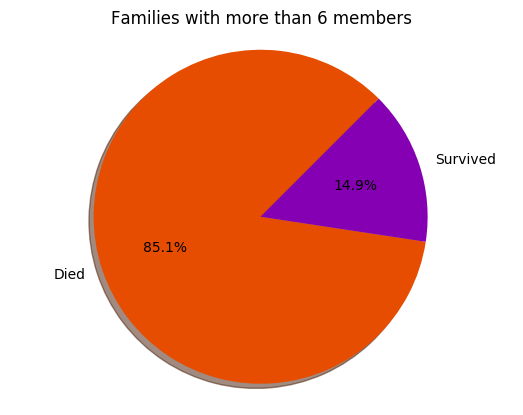

In [0]:
surv = ('Died', 'Survived')
counts = (mem_large['Survived'].value_counts()[0], mem_large['Survived'].value_counts()[1])

plt.title('Families with more than 6 members')


colors = ['#e64d00', '#8600b3']

plt.pie(counts, labels=surv, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=45)

plt.axis('equal')
plt.show()

In [0]:
mem_small['Survived'].value_counts(normalize=True)

0    0.603081
1    0.396919
Name: Survived, dtype: float64

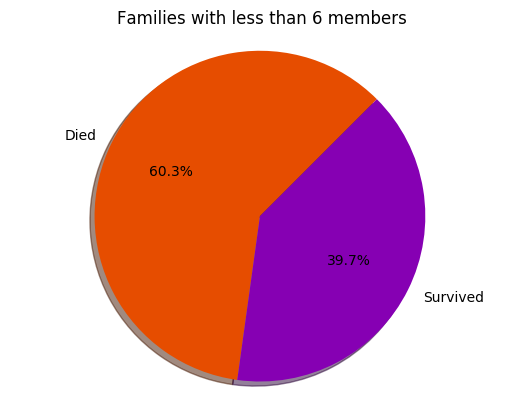

In [0]:
surv = ('Died', 'Survived')
counts = (mem_small['Survived'].value_counts()[0], mem_small['Survived'].value_counts()[1])

plt.title('Families with less than 6 members')


colors = ['#e64d00', '#8600b3']

plt.pie(counts, labels=surv, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=45)

plt.axis('equal')
plt.show()

Families with more than 6 members had a lower survival rate than those with less than 6 members. That is really sad.

## Q7) What difference did socio-economic status make?

The field Pclass in this dataset is a indicator of what the socio-economic status of the passengers:

- 1st = Upper

- 2nd = Middle

- 3rd = Lower


In [0]:
socio = titanic['Pclass'].value_counts()
socio

3    491
1    216
2    184
Name: Pclass, dtype: int64

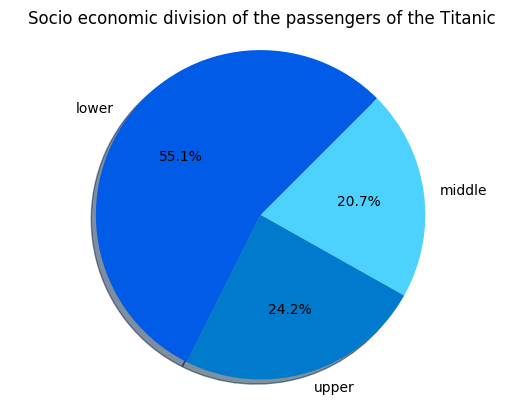

In [0]:
pclasses = ('lower', 'upper', 'middle')
counts = list(socio)

plt.title('Socio economic division of the passengers of the Titanic')


colors = ['#005ce6', '#007acc', '#4dd2ff']

plt.pie(counts, labels=pclasses, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=45)

plt.axis('equal')
plt.show()

Being the large, luxurious, and the "unsinkable" ship it was, it makes sense for the elite upper class to be there in the largest numbers. Let's also compare the money spent by each of the classes on their fares.

In [0]:
money_spent = titanic[['Pclass', 'Fare']]
money_spent = money_spent.groupby('Pclass').sum().sort_values('Fare', ascending=False)
money_spent

,Fare
Pclass,
1,18177.4125
3,6714.6951
2,3801.8417


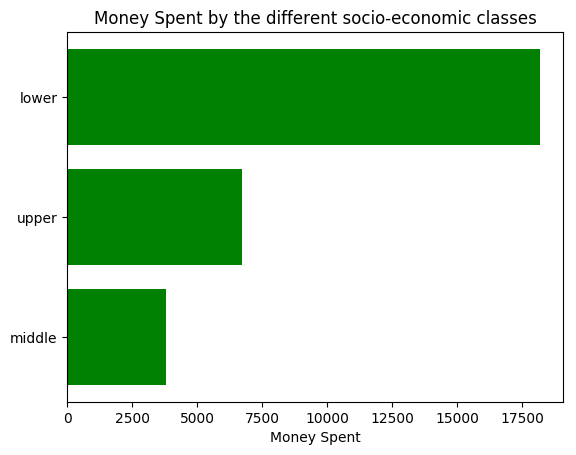

In [0]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

y_pos = np.arange(len(pclasses))

ax.barh(y_pos, money_spent['Fare'], align='center',
        color='green', ecolor='black')
plt.yticks(y_pos, pclasses)
plt.xlabel('Money Spent')
plt.title('Money Spent by the different socio-economic classes')
ax.invert_yaxis()  # labels read top-to-bottom

plt.show()

And finally, what kind of effect did socio-economic status have on the rate of survival?

In [0]:
socio = titanic.groupby('Pclass').sum().sort_values('Pclass', ascending=True)
socio

,PassengerId,Survived,Age,SibSp,Parch,Fare,Family
Pclass,,,,,,,
1,99705,136,8221.42,90,77,18177.4125,383
2,82056,87,5575.83,74,70,3801.8417,328
3,215625,119,13956.92,302,193,6714.6951,986


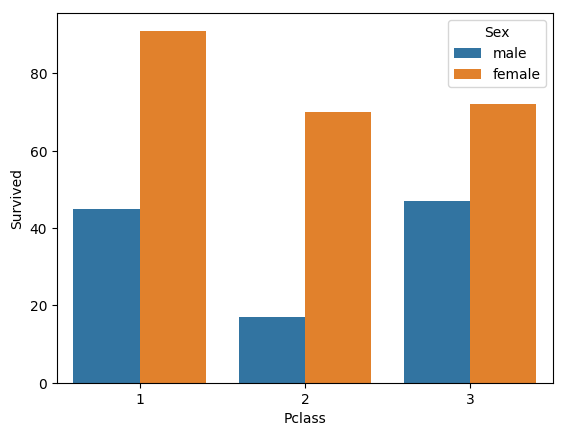

In [0]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic, ci=None, estimator=sum)

## Conclusion and Further Steps

It was a great experience understanding and freely exploring this data set through visualizations. From the overall analysis and visualizations, it is very easy to understand that women survived in great numbers than men, which is gives us a good idea of how to proceed further in the project. Furthermore, studying correlations between names, suffixes, and ticket rates, etc. will help strengthen the idea of what survival is more closely dependent on. 

Studying this dataset and asking questions such as *what happened to women?* or *what happened to children?* helped me gain a lot of insights about how factors such as age difference, socio-economic difference, etc. matter in life and death situations. It also made me empathetic about people stuck in such dire situations like plane crashes, terror attacks, etc. For example, it was very disturbing to know that families with more than 6 members had such a low chance of survival. 

I want to proceed with this project further. Based on this understanding, my further goals would be implementing a machine learning model to predict the number of survivors in the test set. 
